In [12]:
import pandas as pd

# Load csv files
cme_data = pd.read_csv('../data/cme/cme_1h.csv', usecols=['Entry Date UTC', 'Price'])
cme_data['Entry Date UTC'] = pd.to_datetime(cme_data['Entry Date UTC'], format='%Y%m%dT%H:%M:%S')

steth_data = pd.read_csv('../data/steth/steth_1h.csv', usecols=['Entry Date UTC', 'Price'])
steth_data['Entry Date UTC'] = pd.to_datetime(steth_data['Entry Date UTC'])

# Merge the two datasets on 'Entry Date UTC'
dataset = pd.merge(cme_data, steth_data, on='Entry Date UTC', suffixes=('_cme', '_steth'))

print(dataset.head())


       Entry Date UTC  Price_cme  Price_steth
0 2022-01-02 23:00:00     3822.5      3818.02
1 2022-01-03 00:00:00     3838.0      3818.02
2 2022-01-03 01:00:00     3812.0      3791.57
3 2022-01-03 02:00:00     3812.5      3796.46
4 2022-01-03 03:00:00     3807.5      3787.55


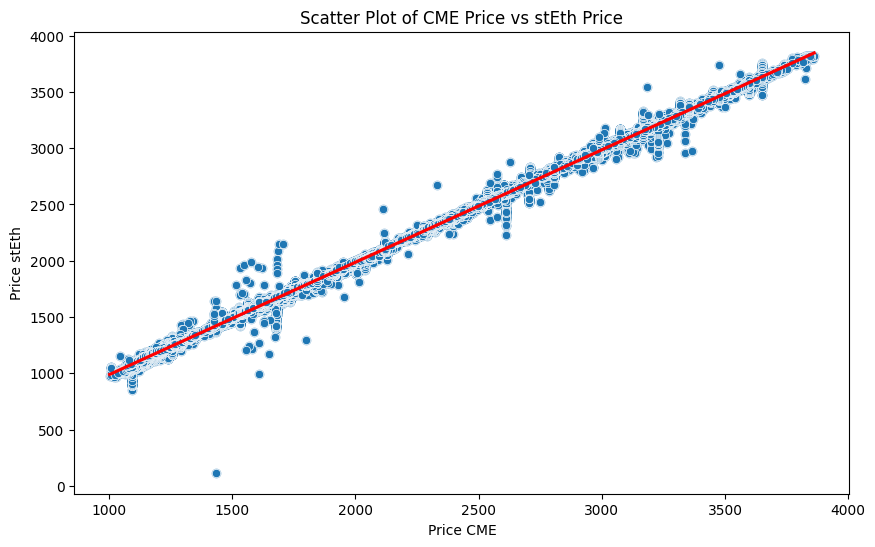

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the 99th percentile
upper_limit = dataset['Price_steth'].quantile(0.99)

# Filter the dataset to remove extreme outliers
filtered_dataset = dataset[dataset['Price_steth'] <= upper_limit]

# Set the size of the plot
plt.figure(figsize=(10, 6))  # Width and height in inches

# Add regression line
sns.regplot(x='Price_cme', y='Price_steth', data=filtered_dataset, scatter_kws={'alpha':0.5}, line_kws={"color": "red"})

# Plotting the dataset
sns.scatterplot(x='Price_cme', y='Price_steth', data=filtered_dataset)
plt.title('Scatter Plot of CME Price vs stEth Price')
plt.xlabel('Price CME')
plt.ylabel('Price stEth')
plt.show()


In [15]:
# Calculate the Pearson correlation coefficient
correlation_coefficient = filtered_dataset['Price_cme'].corr(filtered_dataset['Price_steth'])
print("Pearson Correlation Coefficient:", correlation_coefficient)


Pearson Correlation Coefficient: 0.9985290823487663


In [17]:
''' R2: the model explains 99.71% of the variance in the Price_steth based on the variance in Price_cme'''

from sklearn.linear_model import LinearRegression
import numpy as np

# Setting up the regression model
model = LinearRegression()
model.fit(filtered_dataset[['Price_cme']], filtered_dataset['Price_steth'])

# Getting the regression coefficients
intercept = model.intercept_
slope = model.coef_[0]

# Printing the results
print(f"Regression equation: y = {slope:.4f}x + {intercept:.4f}")
print(f"Coefficient of Determination (R^2): {model.score(filtered_dataset[['Price_cme']], filtered_dataset['Price_steth']):.4f}")


Regression equation: y = 0.9990x + -12.1051
Coefficient of Determination (R^2): 0.9971


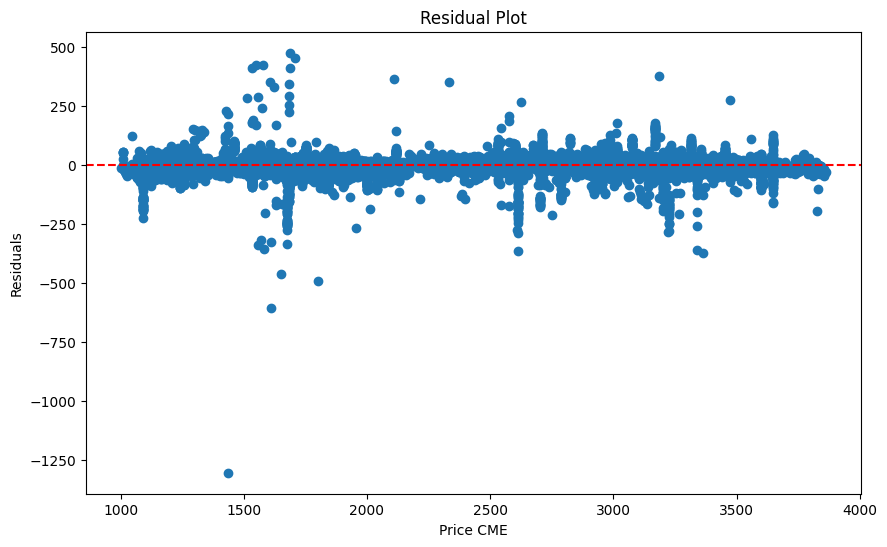

In [18]:
''' Residual Plot (the closer to zero, the better)'''

# Calculate predictions and residuals
predictions = model.predict(filtered_dataset[['Price_cme']])
residuals = filtered_dataset['Price_steth'] - predictions

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(filtered_dataset['Price_cme'], residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Price CME')
plt.ylabel('Residuals')
plt.show()
